In [17]:
import re
PATTERN = r'\w+'

my_string = "Let's write RegEx!"
re.findall(PATTERN, my_string)

# setence ending
sentence_endings = r'[.!?]' 
#re.findall(sentence_endings, my_string)
print(re.findall(PATTERN, my_string))

capitalize_words = r"[A-Z]\w+"# returns strings that start with a capital letter

print(re.findall(capitalize_words, my_string))

spaces = r'\s+'
print(re.split(spaces, my_string))# returns the string split by spaces, if theres in more then one string it will split by all of them

digits = r'\d+'

# re.findall is used to find all occurrences of the pattern 

['Let', 's', 'write', 'RegEx']
['Let', 'RegEx']
["Let's", 'write', 'RegEx!']


'\\d+'

```python
import re
-- re.fidal() # is a method that method under re doc, where its purpose is to find a specific pattern, given <pattern> defnied in class code ie : "/w, /s,/d" ...
re.findall(<pattern>, string)
```

In [22]:
import numpy as np
import pandas as pd
dataset_filename = "affinity_dataset.txt"
X = np.loadtxt(dataset_filename)


n_samples, n_features = X.shape # this is a tuple (rows, columns) ( by def a tuple is a finite ordered list of elements)
print("This dataset has {0} samples and {1} features".format(n_samples, n_features))

This dataset has 100 samples and 5 features


In [23]:
print(X[0:5]) # print the first 5 rows of the dataset

#print the first 3 columns of the dataset
print(X[:5, :3])


#feature names of the dataset
features = ["bread", "milk", "cheese", "apples", "bananas"]

df = pd.DataFrame(X, columns = features)

df



[[0. 0. 1. 1. 1.]
 [1. 1. 0. 1. 0.]
 [1. 0. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 1. 0. 0. 1.]]
[[0. 0. 1.]
 [1. 1. 0.]
 [1. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


,bread,milk,cheese,apples,bananas
0,0.0,0.0,1.0,1.0,1.0
1,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,1.0,1.0
4,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
95,0.0,1.0,0.0,0.0,0.0
96,0.0,0.0,1.0,1.0,0.0
97,0.0,1.0,1.0,0.0,0.0
98,0.0,0.0,1.0,1.0,0.0


In [24]:
# for i in X[0:5]:
#     print(i)

# print("The first 5 rows of the dataset are:")

num_apple_purchases = 0
for i in X:
    if i[3] == 1:
        num_apple_purchases += 1

        
print("{0} people bought Apples".format(num_apple_purchases))

36 people bought Apples


In [25]:
count = 0
for i in X:
    for j in i:
        if j == 1:
            count += 1
        else:
            pass

print("{0} people bought something".format(count))



209 people bought something


In [26]:
rule_valid = 0
rule_invalid = 0

for sample in X:
    if sample[3] == 1:
        if sample[4] == 1:
            rule_valid += 1
        else:
            rule_invalid += 1

print("{0} cases of the rule being valid were discovered".format(rule_valid))
print("{0} cases of the rule being invalid were discovered".format(rule_invalid))

21 cases of the rule being valid were discovered
15 cases of the rule being invalid were discovered


In [27]:
# Now we have all the information needed to compute Support and Confidence
support = rule_valid  # The Support is the number of times the rule is discovered.
confidence = rule_valid / num_apple_purchases
print("The support is {0} and the confidence is {1:.3f}.".format(support, confidence))
# Confidence can be thought of as a percentage using the following:
print("As a percentage, that is {0:.1f}%.".format(100 * confidence))

The support is 21 and the confidence is 0.583.
As a percentage, that is 58.3%.


`collections` defaultdict is a dictionary that will return a default value if the key is not found if the key is not found


In [28]:
from collections import defaultdict# 
# Now compute for all possible rules
valid_rules = defaultdict(int) # defaultdict is a dictionary that will return a default value if the key is not found
invalid_rules = defaultdict(int)
num_occurences = defaultdict(int)

for sample in X:
    for premise in range(n_features):
        if sample[premise] == 0: continue
        # Record that the premise was bought in another transaction
        num_occurences[premise] += 1
        for conclusion in range(n_features):
            if premise == conclusion:  # It makes little sense to measure if X -> X.
                continue
            if sample[conclusion] == 1:
                # This person also bought the conclusion item
                valid_rules[(premise, conclusion)] += 1
            else:
                # This person bought the premise, but not the conclusion
                invalid_rules[(premise, conclusion)] += 1
support = valid_rules
confidence = defaultdict(float)
for premise, conclusion in valid_rules.keys():
    confidence[(premise, conclusion)] = valid_rules[(premise, conclusion)] / num_occurences[premise]
    

for premise, conclusion in confidence:
    premise_name = features[premise]
    conclusion_name = features[conclusion]
    print("Rule: If a person buys {0} they will also buy {1}".format(premise_name, conclusion_name))
    print(" - Confidence: {0:.3f}".format(confidence[(premise, conclusion)]))
    print(" - Support: {0}".format(support[(premise, conclusion)]))
    print("")
    
# all possible rules -> 20,
#

Rule: If a person buys cheese they will also buy apples
 - Confidence: 0.610
 - Support: 25

Rule: If a person buys cheese they will also buy bananas
 - Confidence: 0.659
 - Support: 27

Rule: If a person buys apples they will also buy cheese
 - Confidence: 0.694
 - Support: 25

Rule: If a person buys apples they will also buy bananas
 - Confidence: 0.583
 - Support: 21

Rule: If a person buys bananas they will also buy cheese
 - Confidence: 0.458
 - Support: 27

Rule: If a person buys bananas they will also buy apples
 - Confidence: 0.356
 - Support: 21

Rule: If a person buys bread they will also buy milk
 - Confidence: 0.519
 - Support: 14

Rule: If a person buys bread they will also buy apples
 - Confidence: 0.185
 - Support: 5

Rule: If a person buys milk they will also buy bread
 - Confidence: 0.304
 - Support: 14

Rule: If a person buys milk they will also buy apples
 - Confidence: 0.196
 - Support: 9

Rule: If a person buys apples they will also buy bread
 - Confidence: 0.139
 

In [29]:
def print_rule(premise, conclusion, support, confidence, features):
    premise_name = features[premise]
    conclusion_name = features[conclusion]
    print("Rule: If a person buys {0} they will also buy {1}".format(premise_name, conclusion_name))
    print(" - Confidence: {0:.3f}".format(confidence[(premise, conclusion)]))
    print(" - Support: {0}".format(support[(premise, conclusion)]))
    print("")

In [30]:
premise = 1
conclusion = 3
print_rule(premise, conclusion, support, confidence, features)

Rule: If a person buys milk they will also buy apples
 - Confidence: 0.196
 - Support: 9



In [31]:
# Sort by support
from pprint import pprint
pprint(list(support.items()))

[((2, 3), 25),
 ((2, 4), 27),
 ((3, 2), 25),
 ((3, 4), 21),
 ((4, 2), 27),
 ((4, 3), 21),
 ((0, 1), 14),
 ((0, 3), 5),
 ((1, 0), 14),
 ((1, 3), 9),
 ((3, 0), 5),
 ((3, 1), 9),
 ((0, 2), 4),
 ((2, 0), 4),
 ((1, 4), 19),
 ((4, 1), 19),
 ((0, 4), 17),
 ((4, 0), 17),
 ((1, 2), 7),
 ((2, 1), 7)]


In [32]:
from operator import itemgetter
sorted_support = sorted(support.items(), key=itemgetter(1), reverse=True)

In [33]:
for index in range(5):
    print("Rule #{0}".format(index + 1))
    (premise, conclusion) = sorted_support[index][0]
    print_rule(premise, conclusion, support, confidence, features)

Rule #1
Rule: If a person buys cheese they will also buy bananas
 - Confidence: 0.659
 - Support: 27

Rule #2
Rule: If a person buys bananas they will also buy cheese
 - Confidence: 0.458
 - Support: 27

Rule #3
Rule: If a person buys cheese they will also buy apples
 - Confidence: 0.610
 - Support: 25

Rule #4
Rule: If a person buys apples they will also buy cheese
 - Confidence: 0.694
 - Support: 25

Rule #5
Rule: If a person buys apples they will also buy bananas
 - Confidence: 0.583
 - Support: 21



In [34]:
sorted_confidence = sorted(confidence.items(), key=itemgetter(1), reverse=True)

In [35]:
for index in range(5):
    print("Rule #{0}".format(index + 1))
    (premise, conclusion) = sorted_confidence[index][0]
    print_rule(premise, conclusion, support, confidence, features)

Rule #1
Rule: If a person buys apples they will also buy cheese
 - Confidence: 0.694
 - Support: 25

Rule #2
Rule: If a person buys cheese they will also buy bananas
 - Confidence: 0.659
 - Support: 27

Rule #3
Rule: If a person buys bread they will also buy bananas
 - Confidence: 0.630
 - Support: 17

Rule #4
Rule: If a person buys cheese they will also buy apples
 - Confidence: 0.610
 - Support: 25

Rule #5
Rule: If a person buys apples they will also buy bananas
 - Confidence: 0.583
 - Support: 21



In [36]:
from collections import defaultdict

In [37]:
pip install pandas fastparquet


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
pip install pandas pyarrow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame(data={'col1': [1, 2], 'col2': [3, 4]})

# Write to Parquet
df.to_parquet('test.parquet', compression='gzip')

# Read from Parquet
df_read = pd.read_parquet('test.parquet')
print(df_read)


   col1  col2
0     1     3
1     2     4


In [40]:
df_read_pq = pd.read_parquet('part-0.parquet')

n_samples, n_features = df_read_pq.shape

print("This dataset has {0} samples and {1} features".format(n_samples, n_features))

This dataset has 1944210 samples and 92 features


In [41]:
df_read_pq.head(20)

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,...,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
0,0,0,1,3.889038,NaN,NaN,NaN,NaN,NaN,0.851033,...,-0.281498,0.738489,-0.069556,1.380875,2.005353,0.186018,1.218368,0.775981,0.346999,0.095504
1,0,0,7,1.370613,NaN,NaN,NaN,NaN,NaN,0.676961,...,-0.302441,2.965889,1.190077,-0.523998,3.849921,2.626981,5.000000,0.703665,0.216683,0.778639
2,0,0,9,2.285698,NaN,NaN,NaN,NaN,NaN,1.056285,...,-0.096792,-0.864488,-0.280303,-0.326697,0.375781,1.271291,0.099793,2.109352,0.670881,0.772828
3,0,0,10,0.690606,NaN,NaN,NaN,NaN,NaN,1.139366,...,-0.296244,0.408499,0.223992,2.294888,1.097444,1.225872,1.225376,1.114137,0.775199,-1.379516
4,0,0,14,0.440570,NaN,NaN,NaN,NaN,NaN,0.955200,...,3.418133,-0.373387,-0.502764,-0.348021,-3.928148,-1.591366,-5.000000,-3.572820,-1.089123,-5.000000
5,0,0,16,1.118269,NaN,NaN,NaN,NaN,NaN,1.092428,...,-0.189784,0.505199,0.035095,-1.976849,1.335720,-1.215543,-1.593503,0.840550,0.246794,-0.101013
6,0,0,19,2.456331,NaN,NaN,NaN,NaN,NaN,0.747231,...,-0.187166,0.096462,-0.252154,-0.002623,-1.002823,-0.632378,0.112727,-0.807892,-0.704062,0.184303
7,0,0,33,1.663408,NaN,NaN,NaN,NaN,NaN,1.182569,...,-0.171215,0.209253,0.182766,0.010843,1.409293,0.002821,0.147636,0.965387,-0.263765,0.280629
8,0,1,1,3.889038,NaN,NaN,NaN,NaN,NaN,0.917613,...,-0.301006,0.808660,-0.105820,1.493438,1.387199,0.095372,1.163139,0.751976,0.348024,0.041855
9,0,1,7,1.370613,NaN,NaN,NaN,NaN,NaN,0.877172,...,-0.294585,3.119074,1.524680,-0.080976,4.015586,2.337222,5.000000,0.635277,0.009769,0.251455


In [43]:
df_read_pq.keys()

Index(['date_id', 'time_id', 'symbol_id', 'weight', 'feature_00', 'feature_01',
       'feature_02', 'feature_03', 'feature_04', 'feature_05', 'feature_06',
       'feature_07', 'feature_08', 'feature_09', 'feature_10', 'feature_11',
       'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16',
       'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21',
       'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26',
       'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31',
       'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36',
       'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41',
       'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46',
       'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51',
       'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56',
       'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_6

In [103]:
#Compute the mean of each feature

attribure_means = df_read_pq.mean(axis=0)
attribure_means

date_id         93.846288
time_id        424.000000
symbol_id       13.766376
weight           1.973281
feature_00            NaN
                  ...    
responder_4      0.021855
responder_5      0.003327
responder_6      0.001488
responder_7     -0.000482
responder_8      0.001078
Length: 92, dtype: float64

In [115]:
# Calculate the mean of columns 2 to 6
attribute_means = df_read_pq.iloc[:, 2:7].mean(axis=0)
attribure_means

date_id         93.846288
time_id        424.000000
symbol_id       13.766376
weight           1.973281
feature_00            NaN
                  ...    
responder_4      0.021855
responder_5      0.003327
responder_6      0.001488
responder_7     -0.000482
responder_8      0.001078
Length: 92, dtype: float64

In [129]:
attribute_means = df_read_pq.iloc[0:, 4:n_features].mean(axis=0)
attribute_means

feature_00          NaN
feature_01          NaN
feature_02          NaN
feature_03          NaN
feature_04          NaN
                 ...   
responder_4    0.021855
responder_5    0.003327
responder_6    0.001488
responder_7   -0.000482
responder_8    0.001078
Length: 88, dtype: float64

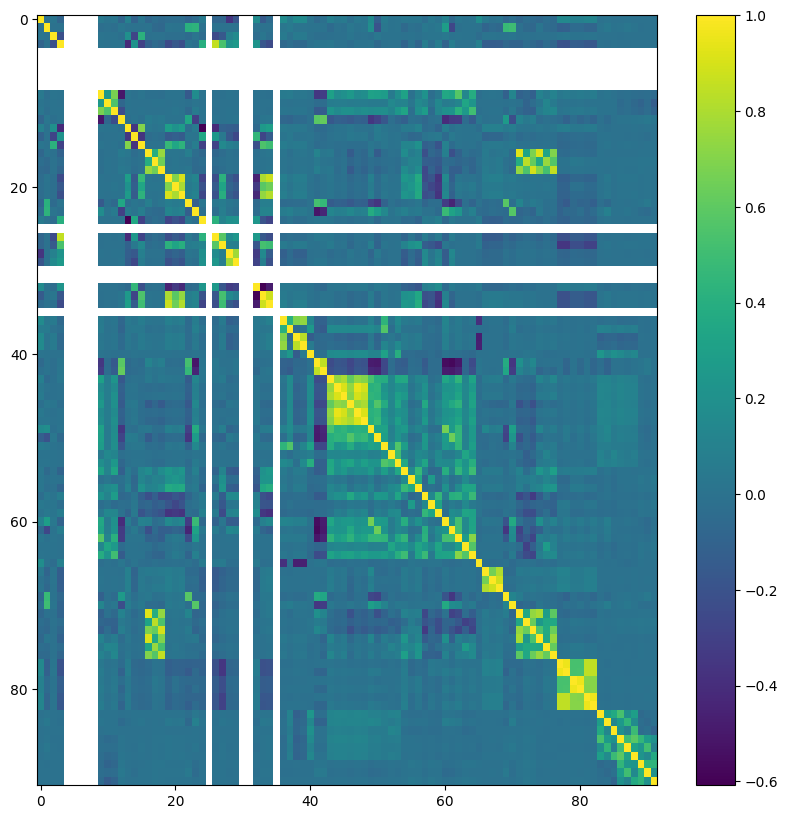

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

CMT = df_read_pq.corr() # Compute the correlation matrix, any blank value will be ignored

plt.figure(figsize=(10, 10))
plt.imshow(CMT, interpolation='none', aspect='auto')
plt.colorbar()


In [136]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
import numpy as np

attribute_means = df_read_pq.iloc[0:, 4:n_features]

attribute_means.head()





,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,...,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
0,NaN,NaN,NaN,NaN,NaN,0.851033,0.242971,0.263400,-0.891687,11,...,-0.281498,0.738489,-0.069556,1.380875,2.005353,0.186018,1.218368,0.775981,0.346999,0.095504
1,NaN,NaN,NaN,NaN,NaN,0.676961,0.151984,0.192465,-0.521729,11,...,-0.302441,2.965889,1.190077,-0.523998,3.849921,2.626981,5.000000,0.703665,0.216683,0.778639
2,NaN,NaN,NaN,NaN,NaN,1.056285,0.187227,0.249901,-0.773050,11,...,-0.096792,-0.864488,-0.280303,-0.326697,0.375781,1.271291,0.099793,2.109352,0.670881,0.772828
3,NaN,NaN,NaN,NaN,NaN,1.139366,0.273328,0.306549,-1.262223,42,...,-0.296244,0.408499,0.223992,2.294888,1.097444,1.225872,1.225376,1.114137,0.775199,-1.379516
4,NaN,NaN,NaN,NaN,NaN,0.955200,0.262404,0.344457,-0.613813,44,...,3.418133,-0.373387,-0.502764,-0.348021,-3.928148,-1.591366,-5.000000,-3.572820,-1.089123,-5.000000


In [141]:
df = attribute_means.columns

len(df)



88

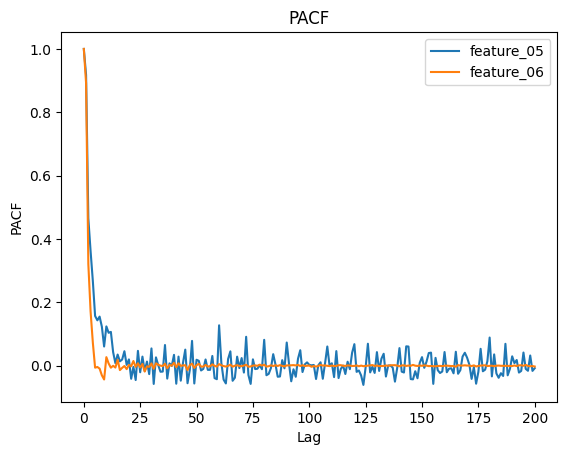

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import pacf

# List of specific features to analyze (by column names or indices)
selected_features = ['feature_05', 'feature_06']  # Replace with your actual column names

# Iterate through the selected features and compute PACF
for feature in selected_features:
    if feature in attribute_means.columns:  # Ensure the feature exists
        pacf_values = pacf(attribute_means[feature], nlags=200, method='ywm')  # 'ywm' is robust
        plt.plot(pacf_values, label=f"{feature}")  # Use the feature name in the label
    else:
        print(f"Feature '{feature}' not found in the dataset!")

# Add legend and labels
plt.legend()
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.title("PACF")
plt.show()


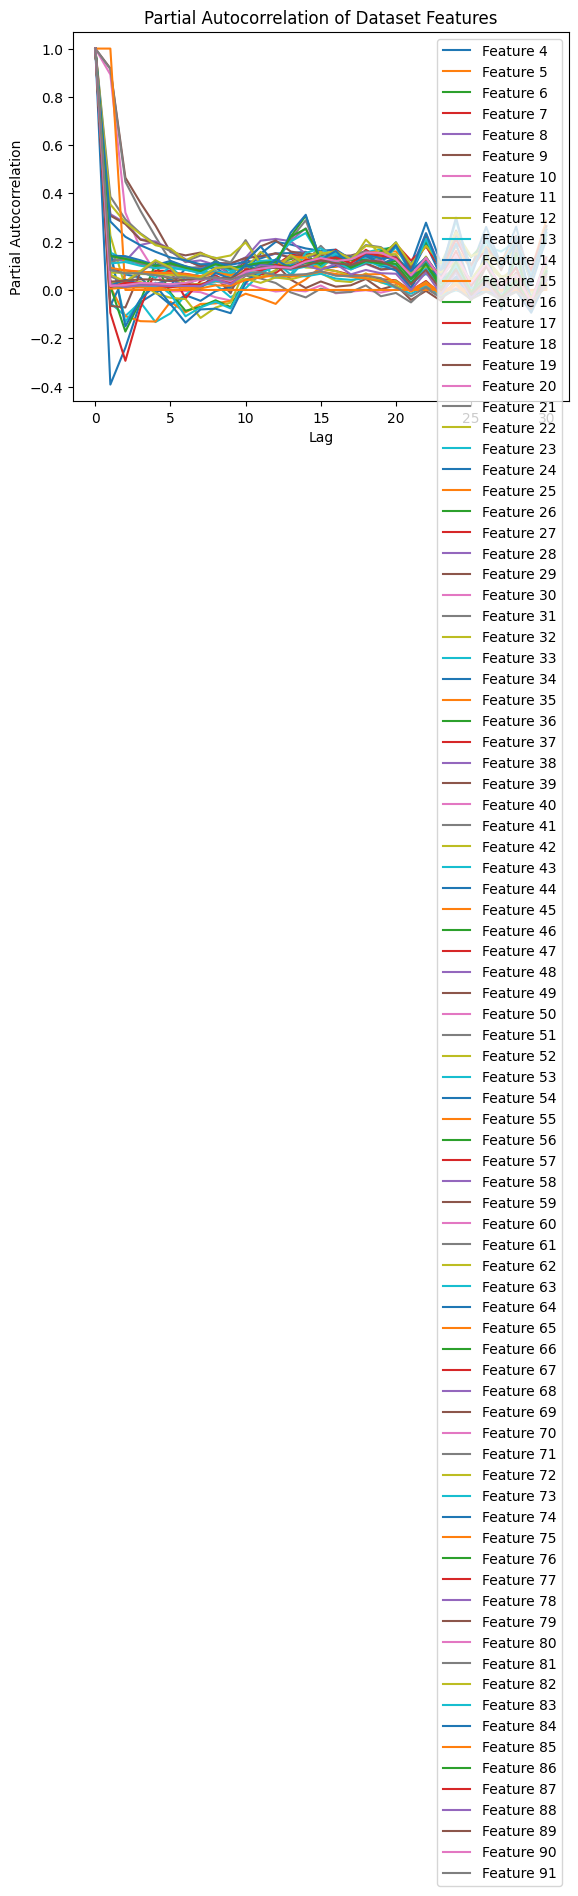

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import pacf
import numpy as np

# Compute and plot the partial autocorrelation for each column
for i in range(attribute_means.shape[1]):
    pacf_values = pacf(attribute_means.iloc[:, i], nlags=30, method='ywm')  # 'ywm' is a robust method
    plt.plot(pacf_values, label=f"Feature {i+4}")  # Replace with actual column names if available

# Add legend and labels
plt.legend()
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.title("Partial Autocorrelation of Dataset Features")
plt.show()


# `pandas.DataFrame.iloc`

`.iloc` provides the ability to control rows and columns of a DataFrame through a process called **integer-location based indexing**.

## Acceptable Inputs:

### a. Integer
An integer allows you to select a specific row or column by its position.

**Example**:
```python
df.iloc[0]  # Fetches the first row (row 0)
```
### b. List of integers
A list of integers enables you to select multiple rows or columns at once. Think of it as pointing to specific rows/columns.
```python
df.iloc[[0, 2]]  # Fetches rows 0 and 2
```
### c. Slice object
A slice object represents a range, which is a continuous set of positions. The slicing uses Python's list slicing syntax (start:end, with the end being exclusive).
```python
df.iloc[1:3]  # Fetches rows 1 and 2 (end is exclusive)
```
### d. Boolean array
A boolean array as a filter, for example consider a sample dataframe with `name`, `Age`, `Score`, defining manually 

```python

import pandas as pd

# Create a sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Diana'],
    'Age': [25, 30, 35, 40],
    'Score': [85, 90, 95, 80]
}
df = pd.DataFrame(data)
df
# Define a Boolean array to select rows where 'Age' > 30
bool_array = [False, False, True, True]

# Use .iloc with the Boolean array
filtered_df = df.iloc[bool_array]

print(filtered_df)

```

In [61]:
import pandas as pd

# Create a sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Diana'],
    'Age': [25, 30, 35, 40],
    'Score': [85, 90, 95, 80]
}
df = pd.DataFrame(data)

# Fetch the first row using a single integer
row = df.iloc[0]  # Fetches row 0 (Alice's row)
print(row)

df



Name     Alice
Age         25
Score       85
Name: 0, dtype: object


,Name,Age,Score
0,Alice,25,85
1,Bob,30,90
2,Charlie,35,95
3,Diana,40,80


In [101]:
num_rows, num_cols = df.shape

num_cols


3

In [73]:
rows = df.iloc[[0, 2]]
rows_S = df.iloc[[0, len()], 1]
rows


,Name,Age,Score
0,Alice,25,85
2,Charlie,35,95


In [111]:
# Fetch rows 1 to 3 (inclusive of 1, exclusive of 3)
sliced_rows = df.iloc[[0],1:3]
sliced_rows



,Age,Score
0,25,85


In [110]:

rows  = df.iloc[[0,1,2,3], 0:3] # [0] is not defined , and  0 is defined then , tabular data is not defined
rows


,Name,Age,Score
0,Alice,25,85
1,Bob,30,90
2,Charlie,35,95
3,Diana,40,80
